In [17]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

import sys

sys.path.append("../")

# functions
from src.evaluation.evaluation_metrics import (
    print_evaluation_metrics,
    plot_roc_curve,
    plot_heatmap_confusion_matrix,
)

from imblearn.over_sampling import SMOTE

# Preprocessing
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    RobustScaler,
    OneHotEncoder,
    OrdinalEncoder,
)
from src.preprocessing.agg_invoice import (
    agg_invoice_num_mode_no_monthly_weighting,
    agg_invoice_num_mode_monthly_weighting,
)
from src.preprocessing.cleaning import convert_dtype_cat_date

# Modeling
from xgboost import XGBClassifier

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

from matplotlib.ticker import PercentFormatter

plt.rcParams.update(
    {"figure.figsize": (8, 5), "axes.facecolor": "white", "axes.edgecolor": "black"}
)
plt.rcParams["figure.facecolor"] = "w"
pd.plotting.register_matplotlib_converters()
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# Define a plotting style to be used for all plots in this notebook
plt.style.use("tableau-colorblind10")

In [18]:
with open("../data/data_ready_for_models.pkl", "rb") as f:
    data = pickle.load(f)

In [19]:
data.keys()
print("def")

def


In [20]:
(
    X_train,
    X_test,
    y_train,
    y_test,
    df_combined,
    df_combined_encoded,
    X_train_resampled,
    y_train_resampled,
) = data.values()

In [21]:
# set resampled values as X_train and y_train
X_train = X_train_resampled
y_train = y_train_resampled

In [22]:
X_train.columns.value_counts()

counter_statue_5      2
counter_statue_1      2
counter_statue_4      2
counter_code_201.0    1
counter_code_305.0    1
                     ..
region_312            1
region_311            1
region_310            1
region_309            1
counter_type_GAZ      1
Name: count, Length: 103, dtype: int64

In [23]:
# drop columns which are twice in the dataset
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

In [24]:
# modeling with XGBOOST

xg_boost_model = XGBClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
)
xg_boost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

---------------------------------------------------------------------------
Confusion Matrix: 
 [[24959   627]
 [ 1293   220]]
---------------------------------------------------------------------------
Accuracy : 
 92.91486770729547
---------------------------------------------------------------------------
Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     25586
         1.0       0.26      0.15      0.19      1513

    accuracy                           0.93     27099
   macro avg       0.61      0.56      0.57     27099
weighted avg       0.91      0.93      0.92     27099

---------------------------------------------------------------------------
ROC-AUC: 
 0.770480234125063


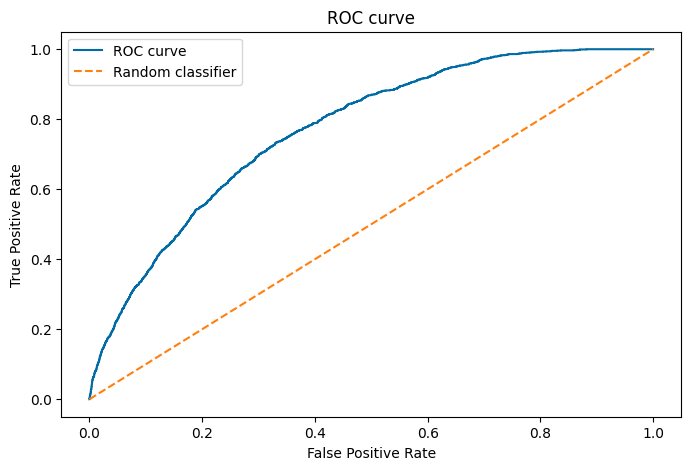

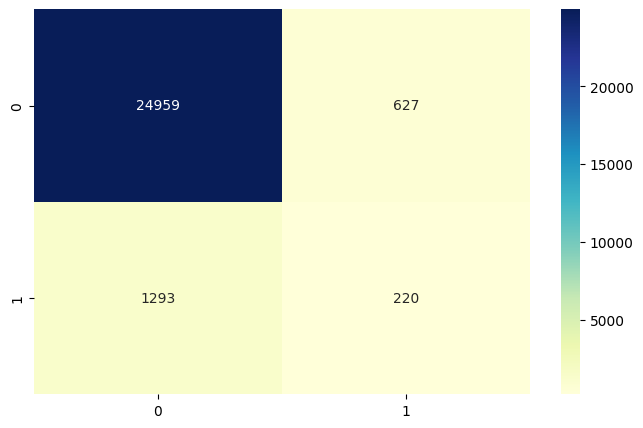

In [25]:
y_train_pred = xg_boost_model.predict(X_train)
y_test_pred = xg_boost_model.predict(X_test)

y_train_pred_proba = xg_boost_model.predict_proba(X_train)
y_test_pred_proba = xg_boost_model.predict_proba(X_test)

"""print_evaluation_metrics(y_train, y_train_pred, y_train_pred_proba)
plot_roc_curve(y_train, y_train_pred_proba)
plot_heatmap_confusion_matrix(y_train, y_train_pred)"""

print_evaluation_metrics(y_test, y_test_pred, y_test_pred_proba)
plot_roc_curve(y_test, y_test_pred_proba)
plot_heatmap_confusion_matrix(y_test, y_test_pred)

### Random Search for Best Parameters for XGBoost

In [26]:
from sklearn.model_selection import RandomizedSearchCV


params = {
    "n_estimators": list(range(5, 100)),
    "learning_rate": list(np.linspace(0.1, 1, 10)),
    # "max_depth": [None]+list(range(3,30))
}

# Instantiate random search and define the metric to optimize
rs = RandomizedSearchCV(
    XGBClassifier(),
    params,
    scoring="roc_auc",
    verbose=5,
    n_jobs=-1,
    n_iter=5,
    random_state=10,
)

In [27]:
rs.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 3/5] END learning_rate=0.2, n_estimators=35;, score=0.987 total time=  51.6s
[CV 1/5] END learning_rate=0.2, n_estimators=35;, score=0.919 total time=  52.1s
[CV 2/5] END learning_rate=0.2, n_estimators=35;, score=0.988 total time=  51.9s
[CV 4/5] END learning_rate=0.2, n_estimators=35;, score=0.988 total time= 1.0min
[CV 5/5] END learning_rate=0.2, n_estimators=35;, score=0.987 total time= 1.1min
[CV 4/5] END learning_rate=0.30000000000000004, n_estimators=80;, score=0.993 total time= 2.1min
[CV 2/5] END learning_rate=0.30000000000000004, n_estimators=80;, score=0.994 total time= 2.1min
[CV 3/5] END learning_rate=0.30000000000000004, n_estimators=80;, score=0.993 total time= 2.1min
[CV 5/5] END learning_rate=0.30000000000000004, n_estimators=80;, score=0.993 total time= 2.1min
[CV 1/5] END learning_rate=0.30000000000000004, n_estimators=80;, score=0.927 total time= 2.1min
[CV 1/5] END learning_rate=0.6, n_estimators=57;, 

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 14, 15, 16, 17,
                                                         18, 19, 20, 21, 22, 23,
                                                         24, 25, 26, 27, 28, 29,
                                                         30, 31, 32, 33, 34, ...]},
                   random_state=10, scoring='roc_auc', verbose=5)

---------------------------------------------------------------------------
Confusion Matrix: 
 [[24954   632]
 [ 1305   208]]
---------------------------------------------------------------------------
Accuracy : 
 92.85213476512048
---------------------------------------------------------------------------
Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     25586
         1.0       0.25      0.14      0.18      1513

    accuracy                           0.93     27099
   macro avg       0.60      0.56      0.57     27099
weighted avg       0.91      0.93      0.92     27099

---------------------------------------------------------------------------
ROC-AUC: 
 0.7712908305718453


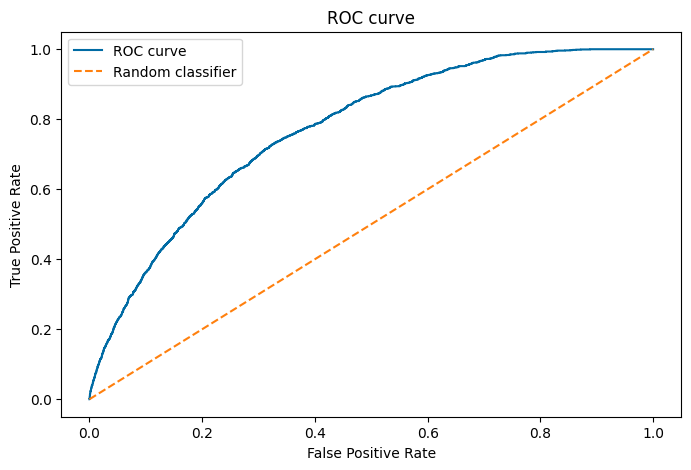

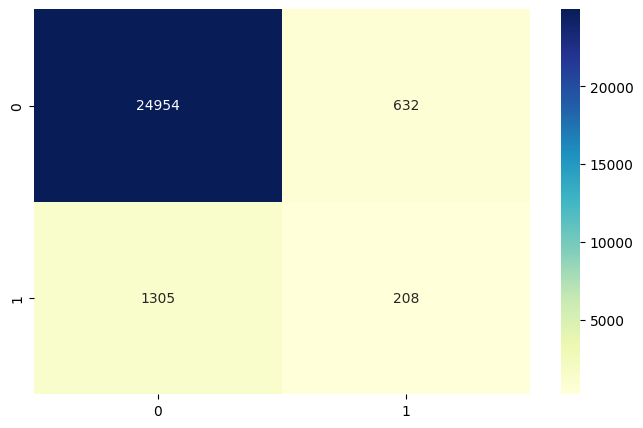

In [28]:
best_boost = rs.best_estimator_

#
y_test_pred = best_boost.predict(X_test)
y_test_pred_proba = best_boost.predict_proba(X_test)
print_evaluation_metrics(y_test, y_test_pred, y_test_pred_proba)
plot_roc_curve(y_test, y_test_pred_proba)
plot_heatmap_confusion_matrix(y_test, y_test_pred)

In [29]:
# summarize results
print("Best: %f using %s" % (rs.best_score_, rs.best_params_))
means = rs.cv_results_["mean_test_score"]
stds = rs.cv_results_["std_test_score"]
params = rs.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label="learning_rate: " + str(value))
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("Log Loss")
plt.show()

Best: 0.981999 using {'n_estimators': 89, 'learning_rate': 0.4}
0.980171 (0.026556) with: {'n_estimators': 80, 'learning_rate': 0.30000000000000004}
0.973763 (0.027542) with: {'n_estimators': 35, 'learning_rate': 0.2}
0.981299 (0.026769) with: {'n_estimators': 57, 'learning_rate': 0.6}
0.978211 (0.026921) with: {'n_estimators': 40, 'learning_rate': 0.4}
0.981999 (0.026353) with: {'n_estimators': 89, 'learning_rate': 0.4}


NameError: name 'learning_rate' is not defined

In [30]:
from sklearn.model_selection import GridSearchCV


n_estimators = list(range(5, 100, 10))
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

gs = GridSearchCV(
    XGBClassifier(), param_grid, scoring="roc_auc", n_jobs=-1, cv=3, verbose=5
)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 2/3] END learning_rate=0.0001, n_estimators=5;, score=0.923 total time=   8.5s
[CV 1/3] END learning_rate=0.0001, n_estimators=5;, score=0.883 total time=   8.9s
[CV 3/3] END learning_rate=0.0001, n_estimators=5;, score=0.922 total time=   8.9s
[CV 2/3] END learning_rate=0.0001, n_estimators=15;, score=0.923 total time=  21.2s
[CV 3/3] END learning_rate=0.0001, n_estimators=15;, score=0.922 total time=  21.6s
[CV 1/3] END learning_rate=0.0001, n_estimators=15;, score=0.883 total time=  22.2s
[CV 2/3] END learning_rate=0.0001, n_estimators=25;, score=0.924 total time=  34.5s
[CV 1/3] END learning_rate=0.0001, n_estimators=25;, score=0.883 total time=  35.2s
[CV 3/3] END learning_rate=0.0001, n_estimators=25;, score=0.922 total time=  35.4s
[CV 2/3] END learning_rate=0.0001, n_estimators=35;, score=0.924 total time=  47.6s
[CV 1/3] END learning_rate=0.0001, n_estimators=35;, score=0.883 total time=  48.5s
[CV 3/3] END lear

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'n_estimators': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                          95]},
             scoring='roc_auc', verbose=5)

Best: 0.976016 using {'learning_rate': 0.1, 'n_estimators': 95}
0.909528 (0.018726) with: {'learning_rate': 0.0001, 'n_estimators': 5}
0.909623 (0.018593) with: {'learning_rate': 0.0001, 'n_estimators': 15}
0.909640 (0.018611) with: {'learning_rate': 0.0001, 'n_estimators': 25}
0.909642 (0.018613) with: {'learning_rate': 0.0001, 'n_estimators': 35}
0.909651 (0.018620) with: {'learning_rate': 0.0001, 'n_estimators': 45}
0.909666 (0.018631) with: {'learning_rate': 0.0001, 'n_estimators': 55}
0.909678 (0.018640) with: {'learning_rate': 0.0001, 'n_estimators': 65}
0.909678 (0.018640) with: {'learning_rate': 0.0001, 'n_estimators': 75}
0.909678 (0.018640) with: {'learning_rate': 0.0001, 'n_estimators': 85}
0.909678 (0.018640) with: {'learning_rate': 0.0001, 'n_estimators': 95}
0.909644 (0.018609) with: {'learning_rate': 0.001, 'n_estimators': 5}
0.909680 (0.018642) with: {'learning_rate': 0.001, 'n_estimators': 15}
0.909830 (0.018647) with: {'learning_rate': 0.001, 'n_estimators': 25}
0.910

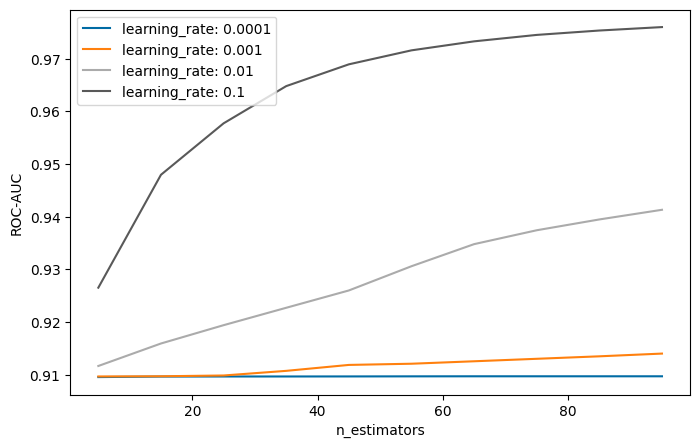

In [31]:
# summarize results
print("Best: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_["mean_test_score"]
stds = gs.cv_results_["std_test_score"]
params = gs.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label="learning_rate: " + str(value))
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("ROC-AUC")
plt.show()

In [32]:
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 95}

---------------------------------------------------------------------------
Confusion Matrix: 
 [[24608   978]
 [ 1223   290]]
---------------------------------------------------------------------------
Accuracy : 
 91.8779290748736
---------------------------------------------------------------------------
Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     25586
         1.0       0.23      0.19      0.21      1513

    accuracy                           0.92     27099
   macro avg       0.59      0.58      0.58     27099
weighted avg       0.91      0.92      0.92     27099

---------------------------------------------------------------------------
ROC-AUC: 
 0.7654839691794851


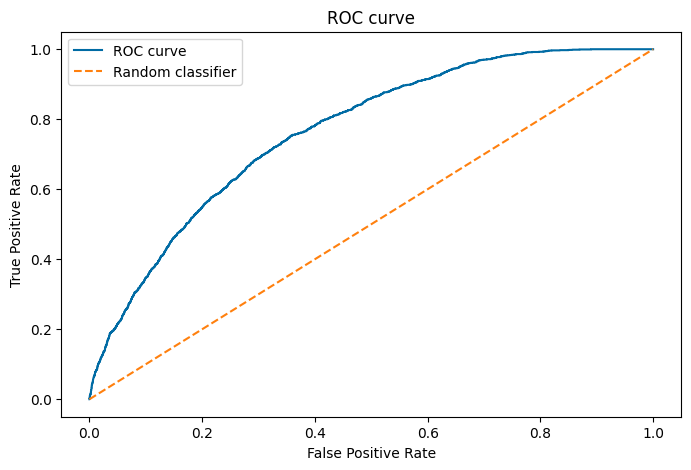

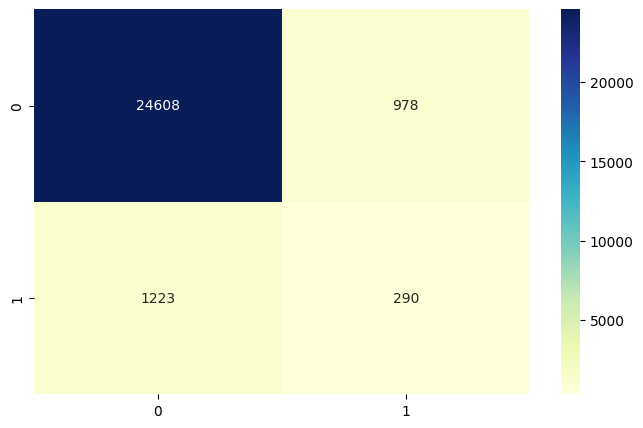

In [33]:
best_boost = gs.best_estimator_

#
y_test_pred = best_boost.predict(X_test)
y_test_pred_proba = best_boost.predict_proba(X_test)
print_evaluation_metrics(y_test, y_test_pred, y_test_pred_proba)
plot_roc_curve(y_test, y_test_pred_proba)
plot_heatmap_confusion_matrix(y_test, y_test_pred)

In [34]:
n_estimators = list(range(65, 140, 10))
learning_rate = list(np.linspace(0.1, 1, 10))
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

gs = GridSearchCV(
    XGBClassifier(), param_grid, scoring="roc_auc", n_jobs=-1, cv=3, verbose=5
)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 2/3] END learning_rate=0.1, n_estimators=65;, score=0.987 total time= 1.4min
[CV 3/3] END learning_rate=0.1, n_estimators=65;, score=0.986 total time= 1.4min
[CV 1/3] END learning_rate=0.1, n_estimators=65;, score=0.946 total time= 1.4min
[CV 2/3] END learning_rate=0.1, n_estimators=75;, score=0.988 total time= 1.6min
[CV 3/3] END learning_rate=0.1, n_estimators=75;, score=0.988 total time= 1.6min
[CV 1/3] END learning_rate=0.1, n_estimators=75;, score=0.948 total time= 1.6min
[CV 2/3] END learning_rate=0.1, n_estimators=85;, score=0.989 total time= 1.8min
[CV 1/3] END learning_rate=0.1, n_estimators=85;, score=0.949 total time= 1.8min
[CV 3/3] END learning_rate=0.1, n_estimators=85;, score=0.988 total time= 1.7min
[CV 1/3] END learning_rate=0.1, n_estimators=95;, score=0.949 total time= 1.8min
[CV 2/3] END learning_rate=0.1, n_estimators=95;, score=0.990 total time= 1.8min
[CV 3/3] END learning_rate=0.1, n_estimators=95

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6, 0.7000000000000001, 0.8,
                                           0.9, 1.0],
                         'n_estimators': [65, 75, 85, 95, 105, 115, 125, 135]},
             scoring='roc_auc', verbose=5)

Best: 0.984006 using {'learning_rate': 0.7000000000000001, 'n_estimators': 135}
0.973306 (0.019077) with: {'learning_rate': 0.1, 'n_estimators': 65}
0.974528 (0.018920) with: {'learning_rate': 0.1, 'n_estimators': 75}
0.975363 (0.018977) with: {'learning_rate': 0.1, 'n_estimators': 85}
0.976016 (0.018962) with: {'learning_rate': 0.1, 'n_estimators': 95}
0.976569 (0.018970) with: {'learning_rate': 0.1, 'n_estimators': 105}
0.977050 (0.018910) with: {'learning_rate': 0.1, 'n_estimators': 115}
0.977459 (0.018872) with: {'learning_rate': 0.1, 'n_estimators': 125}
0.977843 (0.018762) with: {'learning_rate': 0.1, 'n_estimators': 135}
0.977588 (0.018742) with: {'learning_rate': 0.2, 'n_estimators': 65}
0.978226 (0.018765) with: {'learning_rate': 0.2, 'n_estimators': 75}
0.978808 (0.018617) with: {'learning_rate': 0.2, 'n_estimators': 85}
0.979207 (0.018658) with: {'learning_rate': 0.2, 'n_estimators': 95}
0.979627 (0.018624) with: {'learning_rate': 0.2, 'n_estimators': 105}
0.980008 (0.018498

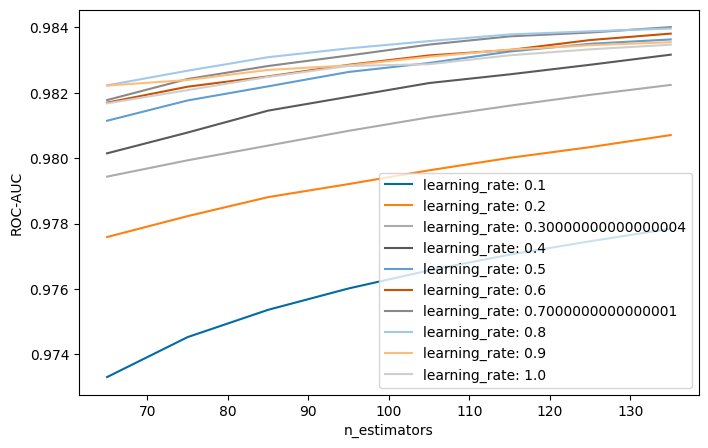

In [35]:
# summarize results
print("Best: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_["mean_test_score"]
stds = gs.cv_results_["std_test_score"]
params = gs.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label="learning_rate: " + str(value))
plt.legend()
plt.xlabel("n_estimators")
plt.ylabel("ROC-AUC")
plt.show()

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7000000000000001,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=135, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)>
---------------------------------------------------------------------------
Confusion Matrix: 
 [[24899   687]
 [ 1328   185]]
---------------------------------------------------------------------

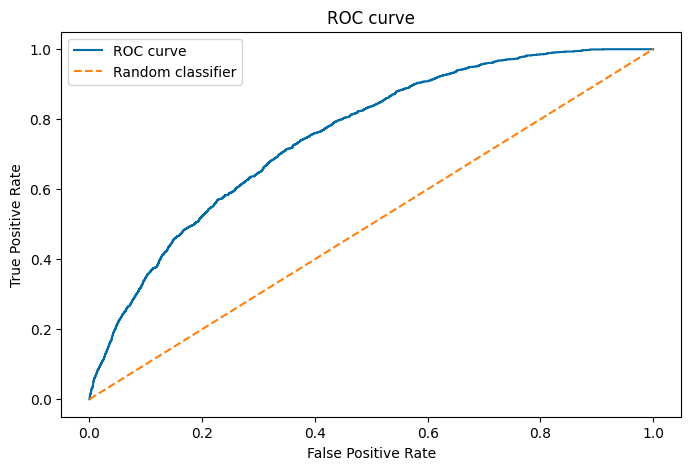

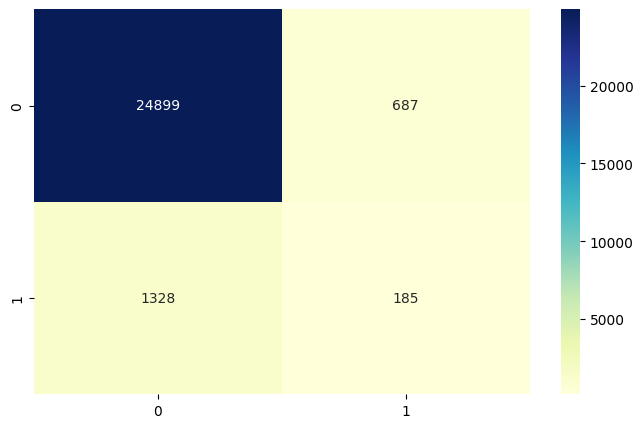

In [36]:
best_boost = gs.best_estimator_
print(best_boost.get_params)
#
y_test_pred = best_boost.predict(X_test)
y_test_pred_proba = best_boost.predict_proba(X_test)
print_evaluation_metrics(y_test, y_test_pred, y_test_pred_proba)
plot_roc_curve(y_test, y_test_pred_proba)
plot_heatmap_confusion_matrix(y_test, y_test_pred)

In [39]:
# save results as pickle:
best_gs = gs

data = {"best_gs": best_gs, "best_boost": best_boost}

with open("../models/xgboost/xgboost_grid_smote.pkl", "wb") as f:
    pickle.dump(data, f)

,creation_date,months_number,invoice_date,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,district_62,district_63,...,counter_code_506.0,counter_code_532.0,counter_code_565.0,counter_code_600.0,reading_remarque_7.0,reading_remarque_8.0,reading_remarque_9.0,reading_remarque_203.0,reading_remarque_413.0,counter_type_GAZ
client_id,,,,,,,,,,,,,,,,,,,,,
train_Client_46032,1451001600000000000,3.636,1513877236363636480,1.000,161.812,43.288,65.463,129.325,False,False,...,False,False,False,False,False,False,True,False,False,False
train_Client_8884,1289606400000000000,4.000,1331436342857142784,1.000,119.536,49.911,0.000,0.000,False,False,...,False,False,False,False,False,False,False,False,False,False
train_Client_80860,1225152000000000000,4.194,1389334296774193664,1.000,98.692,0.000,0.000,0.000,False,False,...,False,False,False,False,False,False,False,False,False,False
train_Client_21716,467856000000000000,4.542,1384837200000000000,1.000,105.156,0.000,0.000,0.000,False,False,...,False,False,False,False,False,False,True,False,False,False
train_Client_95171,606700800000000000,3.877,1379907692307692288,1.000,66.548,0.000,0.000,0.000,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_Client_107750,879984000000000000,4.000,1343085942857142784,1.000,249.786,53.714,6.018,0.000,True,False,...,False,False,False,False,False,False,False,False,False,False
train_Client_59063,897436800000000000,3.731,1364120597014925312,1.000,79.760,0.000,0.000,0.000,False,False,...,False,False,False,False,False,False,False,False,False,False
train_Client_68496,1215820800000000000,3.882,1392145411764705792,1.000,107.015,0.000,0.000,0.000,False,False,...,False,False,False,False,False,False,False,False,False,False
